# Aerosoleja ilmassa?

*Tämä harjoite on esimerkki laskennallisesta esseestä opiskelijatöitä varten.*

*Varsinaisessa työssä odotetaan syvällisempää pohdintaa aiheen tiimoilta.*

## Mistä on kyse?

Tutustuin kurssilla aerosoleihin, kantajakaasuun sekoittuneisiin pienhiukkasiin, joilla on suuri vaikutus planeettamme toimintaan. Ne osallistuvat ilmastonmuutokseen monin tavoin, kuten lisäämällä pilvien muodostusta ja täten planeettamme albedoa, mutta vastaavasti niiden kerääntymisellä ilmakehään on myös haittavaikutuksia, kuten ilmanlaadun huononeminen ja siitä seuraavat terveysongelmat.


## Aihevalinta ja tutkimuskysymys

Valitsin ensimmäiseksi tarkasteltavaksi aiheekseni Hyytiälän SMEAR-II -aseman mittaaman aerosolien kokonaismäärän vuoden 2023 aikana saadakseni yleiskuvaa tilanteeseen. Vertaan sitä alueen lämpötilamittauksiin nähdäkseni rautalankatasolla onko näiden kahden suureen välillä jotain selkeää yhteyttä ennen syvempää tarkastelua.

<img src = "https://lh3.googleusercontent.com/pw/AIL4fc_LLVnGNp-y5gbwm65FwqwgOPGCyfnzqtt6GwcaVISMZRjZJXHkv1ZfzPNFUDhW6w45aHOru0P02YkWNNJm5r2DqJBj8cFOWKm1pnvssQe6MuhMOZsPKiFmZqS4iOcahjKc4ajgKqJR9KwH-Hv_bidM=w1600-h998-s-no?authuser=0" >

(kuva Hyytiälän mittaustornilta, tekijä Juho Aalto)

## Aineisto

In [1]:
# Tuodaan tarvittavat komentokirjastot.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
# Kokonaisaerosolitiheys DMPS
aero = pd.read_csv("Hyy-23-total.csv",
                  parse_dates = {"Aika":["Year", "Month", "Day", "Hour"]}, keep_date_col = True)

# Kokonaisaerosolitiheys CPC
cpc = pd.read_csv("Hyy-23-cpc.csv",
                  parse_dates = {"Aika":["Year", "Month", "Day", "Hour"]}, keep_date_col = True)

# Lämpötilamittaukset ilmassa 33,6 metrin ja maanpinnalla 4,2 metrin korkeuksilla.
temp = pd.read_csv("Hyy-23-temp.csv",
                  parse_dates = {"Aika":["Year", "Month", "Day", "Hour"]}, keep_date_col = True)

In [23]:
# Kurkkaus aineiston muotoon.
aero

,Aika,Year,Month,Day,Hour,Minute,Second,HYY_DMPS.tconc
0,2023-01-01 00:00:00,2023,01,01,00,0,0,974.09900
1,2023-01-01 01:00:00,2023,01,01,01,0,0,577.34615
2,2023-01-01 02:00:00,2023,01,01,02,0,0,417.95455
3,2023-01-01 03:00:00,2023,01,01,03,0,0,626.77199
4,2023-01-01 04:00:00,2023,01,01,04,0,0,654.13317
...,...,...,...,...,...,...,...,...
5321,2023-08-12 19:00:00,2023,08,12,19,0,0,1287.87451
5322,2023-08-12 20:00:00,2023,08,12,20,0,0,1432.01900
5323,2023-08-12 21:00:00,2023,08,12,21,0,0,1526.64815
5324,2023-08-12 22:00:00,2023,08,12,22,0,0,2251.04569


## Analyysi

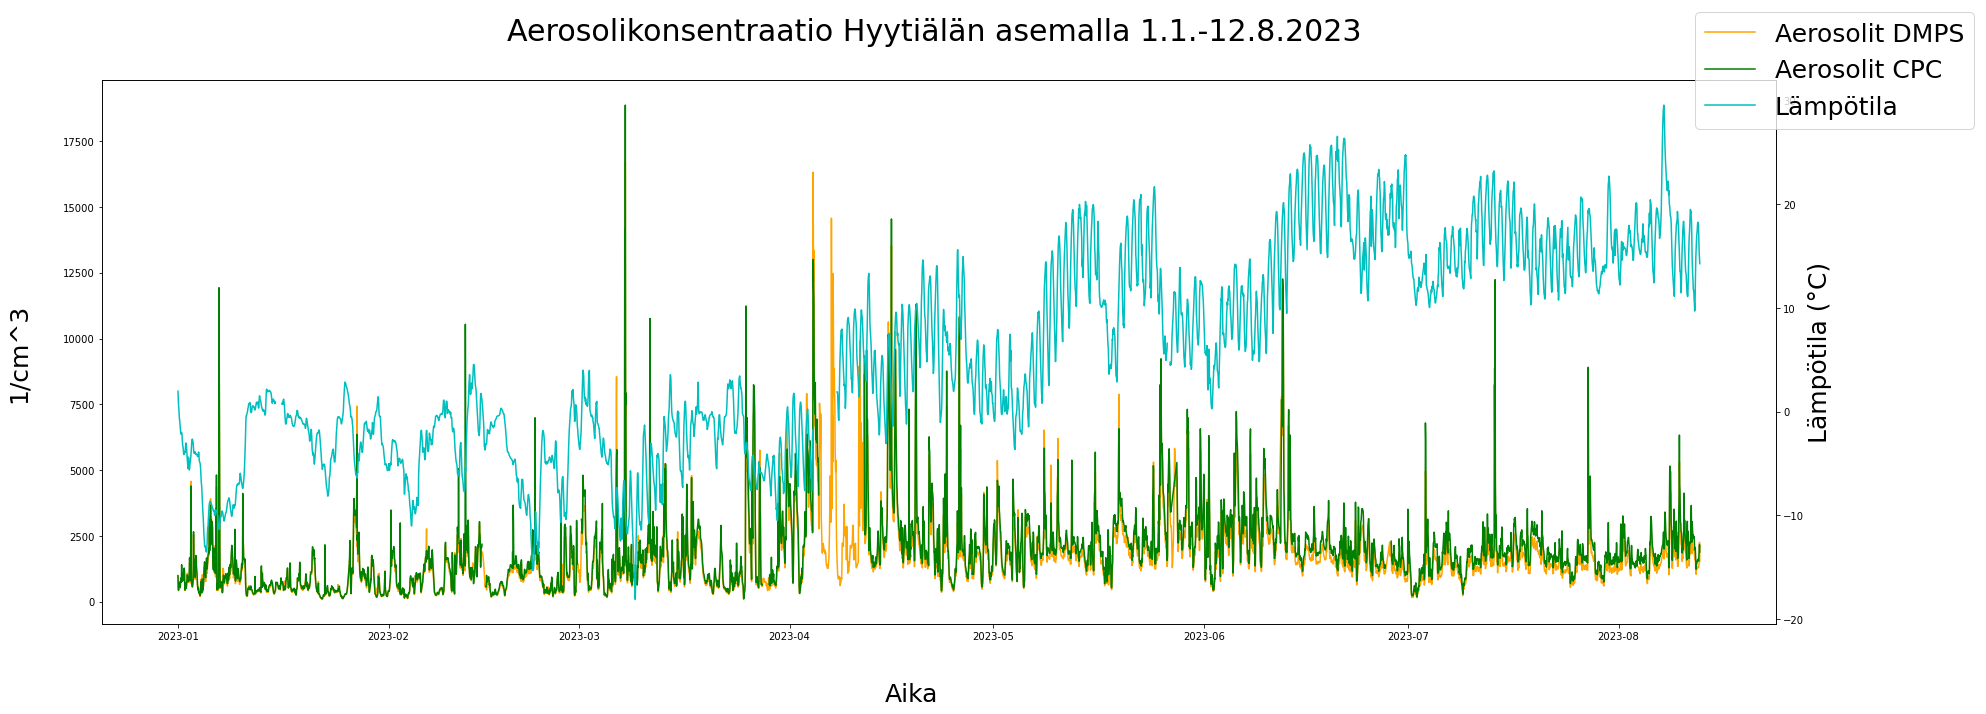

In [32]:
# Piirretään kuvaaja.

fig = plt.figure(figsize = (30, 10))

plt.plot(aero["Aika"], aero["HYY_DMPS.tconc"], "orange", label = "Aerosolit DMPS")
plt.ylabel("1/cm^3\n", fontsize = 25)

plt.plot(cpc["Aika"], cpc["HYY_AERO.cn"], "green", label = "Aerosolit CPC")
plt.ylabel("1/cm^3\n", fontsize = 25)

plt.twinx()

plt.plot(temp["Aika"], temp["HYY_META.T336"], "c", label = "Lämpötila")
plt.ylabel("Lämpötila (°C)", fontsize = 25)

plt.title("Aerosolikonsentraatio Hyytiälän asemalla 1.1.-12.8.2023 \n", fontsize = 30)
fig.supxlabel("\nAika", fontsize = 25)

fig.legend(loc = "upper right", fontsize = 25)
plt.show()

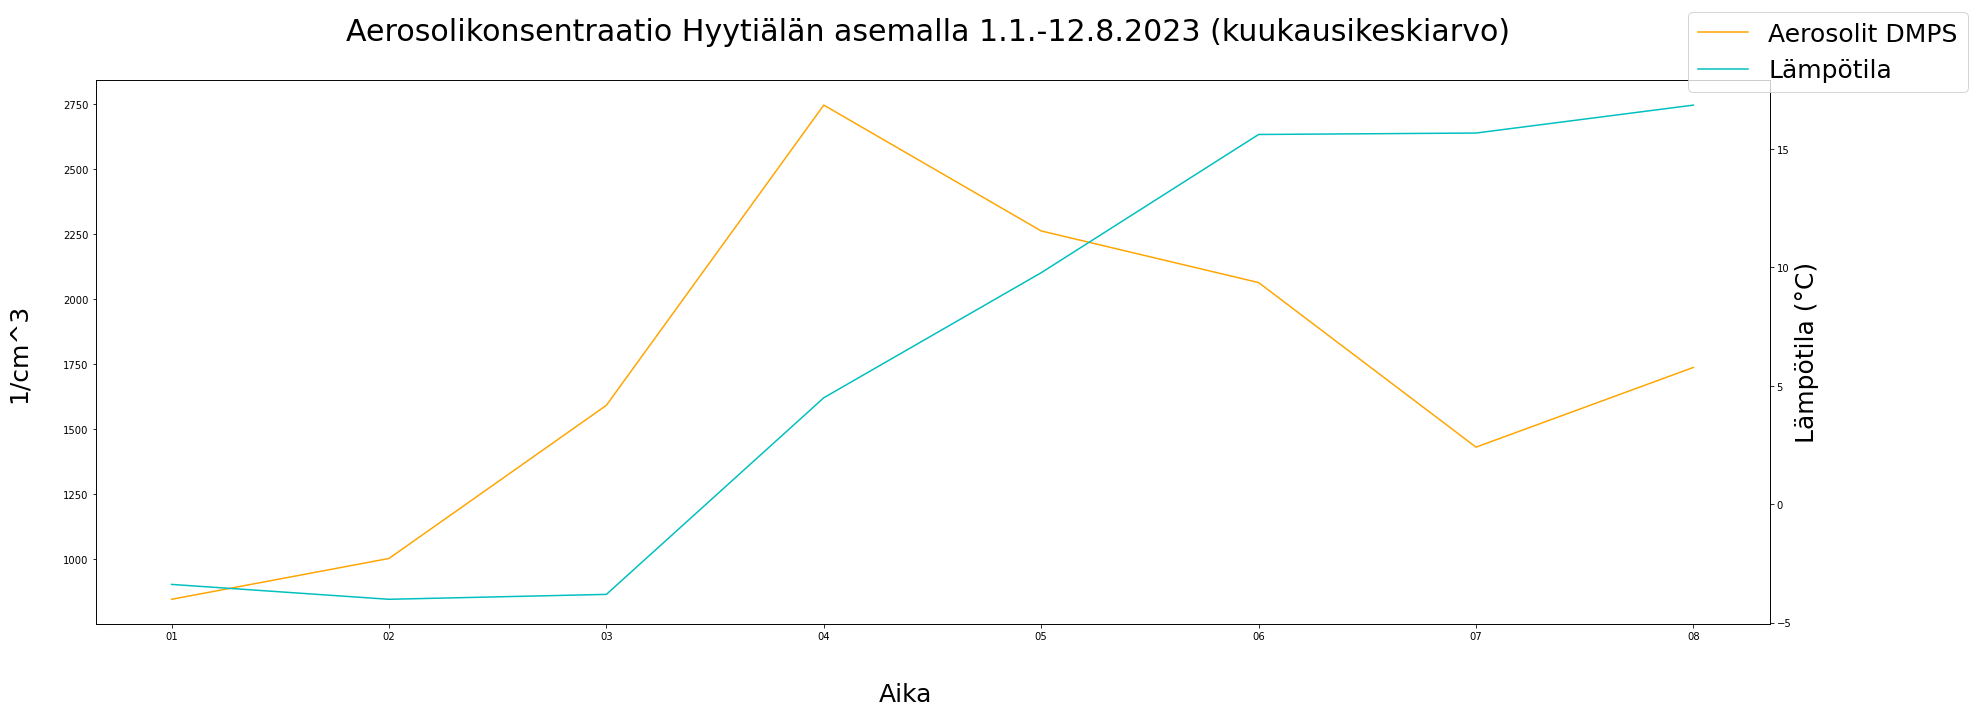

In [34]:
# Kuukausikeskiarvot.

KKA = aero.groupby(["Month"]).mean()
KKT = temp.groupby(["Month"]).mean()

# Piirretään kuvaaja.

fig = plt.figure(figsize = (30, 10))

plt.plot(KKA["HYY_DMPS.tconc"], "orange", label = "Aerosolit DMPS")
plt.ylabel("1/cm^3\n", fontsize = 25)

plt.twinx()

plt.plot(KKT["HYY_META.T336"], "c", label = "Lämpötila")
plt.ylabel("Lämpötila (°C)", fontsize = 25)

plt.title("Aerosolikonsentraatio Hyytiälän asemalla 1.1.-12.8.2023 (kuukausikeskiarvo) \n", fontsize = 30)
fig.supxlabel("\nAika", fontsize = 25)
fig.legend(loc = "upper right", fontsize = 25)
plt.show()

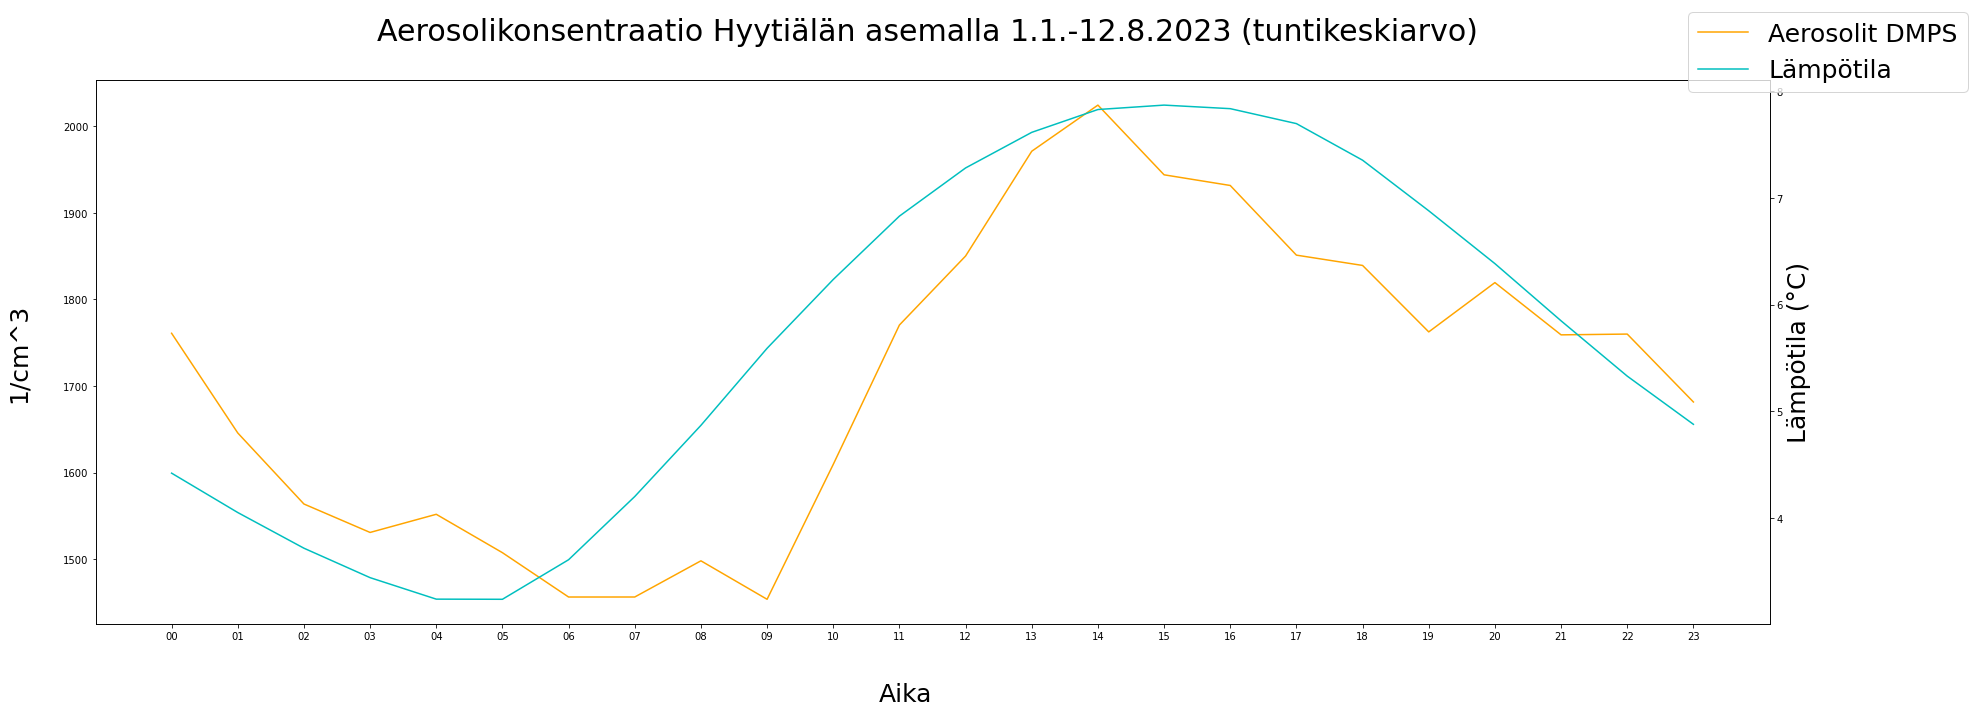

In [35]:
# Kellonajan mukaan.

KA = aero.groupby(["Hour"]).mean()
KT = temp.groupby(["Hour"]).mean()

# Piirretään kuvaaja.

fig = plt.figure(figsize = (30, 10))

plt.plot(KA["HYY_DMPS.tconc"], "orange", label = "Aerosolit DMPS")
plt.ylabel("1/cm^3\n", fontsize = 25)

plt.twinx()

plt.plot(KT["HYY_META.T336"], "c", label = "Lämpötila")
plt.ylabel("Lämpötila (°C)", fontsize = 25)

plt.title("Aerosolikonsentraatio Hyytiälän asemalla 1.1.-12.8.2023 (tuntikeskiarvo) \n", fontsize = 30)
fig.supxlabel("\nAika", fontsize = 25)
fig.legend(loc = "upper right", fontsize = 25)
plt.show()

## Pohdintaa

Vertaamalla aerosolien kokonaismääriä lämpötilakehitykseen alkuvuoden kohdalla voidaan todeta, ettei suhde ole ihan niin yksinkertainen kuin "lämpimällä kelillä kehittyy enemmän pienhiukkasia" antaisi ymmärtää. Kesällä tapahtuu enemmän kuin talvella, mutta vähemmän kuin keväällä.

Vuorokaudenaikaan suhteutettuna kehityskulku sen sijaan onkin astetta jännittävämpi! Siitä saisi varmaan vielä tarkempia näkemyksiä, jos tarkastelisi koko vuoden sijasta yksittäisten vuodenaikojen arvoja vaikka useamman vuodenkin ajalta.


## Lähteet

Kuvat: https://wiki.helsinki.fi/display/SMEAR/More+photos+for+PR+and+educational+use

Tietoja Hyytiälän asemasta: https://www.helsinki.fi/fi/tutkimusasemat/hyytialan-metsaasema/tutkimus

Aineistot: https://smear.avaa.csc.fi/download